In [46]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from PIL import Image
import numpy as np
import IPython.display as display

import tensorflow_hub as hub

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False
import time
import functools

In [47]:
# 원본 이미지 폴더 경로
input_folder = "/content/drive/MyDrive/sample_data_image2"

# 결과 이미지 저장 폴더 경로
output_folder = "/content/drive/MyDrive/sample_data_image_result2"

# 스타일 이미지 경로
style_image_path = '/content/drive/MyDrive/transfer_image/image6.jpg'

# 결과 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [48]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [49]:
def style_transfer(input_image, style_image, model):
    stylized_image = model(tf.constant(input_image), tf.constant(style_image))[0]
    return stylized_image

In [50]:
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        # 원본 이미지 불러오기
        image_path = os.path.join(input_folder, filename)
        content_image = tf.image.decode_image(tf.io.read_file(image_path), channels=3)
        content_image = tf.image.convert_image_dtype(content_image, tf.float32)
        content_image = content_image[tf.newaxis, :]

        # 스타일 이미지 불러오기
        style_image = tf.image.decode_image(tf.io.read_file(style_image_path), channels=3)
        style_image = tf.image.convert_image_dtype(style_image, tf.float32)
        style_image = style_image[tf.newaxis, :]

        # 스타일 전이 적용
        stylized_image = style_transfer(content_image, style_image, model)

        # 결과 이미지 저장
        output_image_path = os.path.join(output_folder, filename)
        tf.keras.preprocessing.image.save_img(output_image_path, stylized_image[0])

In [51]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img


In [72]:
content_image = load_image('/content/drive/MyDrive/sample_data_image2/110100120220620114216.jpg')
style_image = load_image('/content/drive/MyDrive/transfer_image/image6.jpg')

In [73]:
content_image.shape

TensorShape([1, 600, 776, 3])

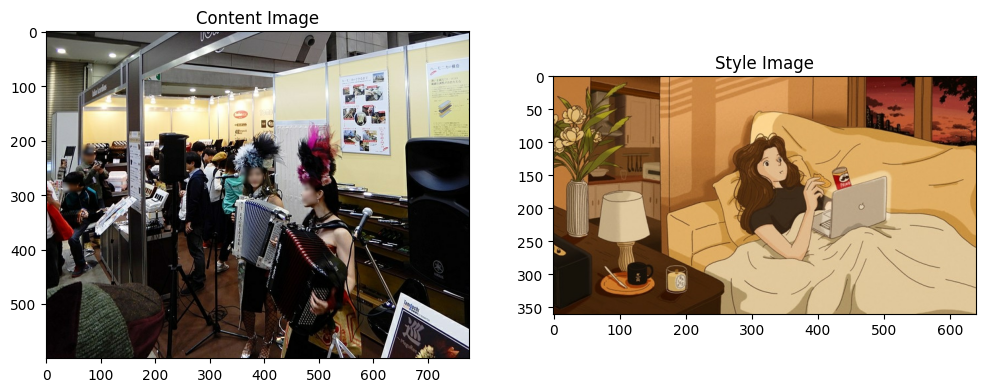

In [74]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [75]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

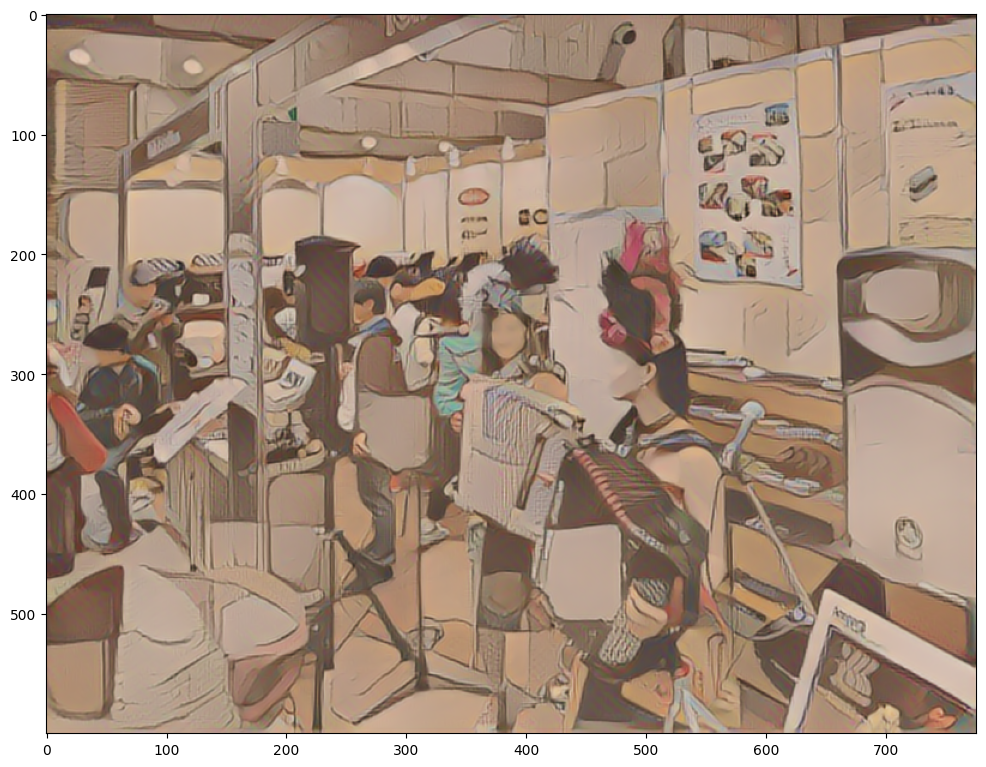

In [76]:
plt.imshow(np.squeeze(stylized_image))
plt.show()